# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
!pip install citipy==0.0.5


    100% |████████████████████████████████| 563kB 7.4MB/s ta 0:00:011
  Running setup.py bdist_wheel for citipy ... done
  Stored in directory: /Users/ratanhodar/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count

data2_pd = pd.DataFrame()
data2_pd["City"] = ""
data2_pd["Cloudiness"] = ""
data2_pd["Country"] = ""
data2_pd["Date"] = ""
data2_pd["Humidity"] = ""
data2_pd["Lat"] = ""
data2_pd["Long"] = ""
data2_pd["Max_Temp"] = ""
data2_pd["Wind_Speed"] = ""


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
#print(f"{cities}")
settings = {"units": "metric", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "whitehorse"
units = "metric"
#settings = {"units": "metric", "appid": api_key}
Cit = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Long = []
Max_Temp = []
Wind_Speed = []

query_url = f"{url}&q={city}&units={units}&appid={api_key}"

#weather_response = requests.get(query_url)
#weather_json = weather_response.json()
count = 0
flag = 1
print(f"Beginning Data Retrieval")     
print("-----------------------------")
#randomIteratorCities = iter(cities)
#for index, city in randomIteratorCities:
#for index, row in data_pd.iterrows():
for city in cities:
    
    try:
        query_url = f"{url}&q={city}&units={units}&appid={api_key}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        Cit1 = weather_json["name"] 
        cloud = weather_json["clouds"]["all"]
        countrys = weather_json["sys"]["country"]
        dts = weather_json["dt"]
        humiditys = weather_json["main"]["humidity"]
        lats = weather_json["coord"]["lat"]
        lons = weather_json["coord"]["lon"]
        tms = weather_json["main"]["temp_max"]
        speeds = weather_json["wind"]["speed"]
        print(f"Processing Record {count} for set {flag} | {city}")
        if city not in Cit:    
            Cit.append(Cit1)
        if city not in Cloudiness:
            Cloudiness.append(cloud)
        if city not in Country:
            Country.append(countrys)
        if city not in Date:
            Date.append(dts)
        if city not in Humidity:
             Humidity.append(humiditys)
        if city not in Lat:
             Lat.append(lats)
        if city not in Long:
            Long.append(lons)
        if city not in Max_Temp:
            Max_Temp.append(tms)
        if city not in Wind_Speed:
            Wind_Speed.append(speeds)
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")   
    
    flag += 1  
    
    count +=1    

#     Cloudiness.append(cloud)
#     countrys = weather_json["sys"]["country"]
#     Country.append(countrys)
#     dts = weather_json["dt"]
#     Date.append(dts)
#     humiditys = weather_json["main"]["humidity"]
#     Humidity.append(humiditys)
#     lats = weather_json["coord"]["lat"]
#     Lat.append(lats)
#     lons = weather_json["coord"]["lon"]
#     Long.append(lons)
#     tms = weather_json["main"]["temp_max"]
#     Max_Temp.append(tms)
#     speeds = weather_json["wind"]["speed"]
#     Wind_Speed.append(speeds)
#     weather_json
        
        #print(f"Processing Record {Cit}       | {city}")
        
#     try:
#         data2_pd.loc["City"] = weather_json["name"]
#         data2_pd.loc["Cloudiness"] = weather_json["clouds"]["all"]
#         data2_pd.loc["Country"] = weather_json["sys"]["country"]
#         data2_pd.loc["Date"] = weather_json["dt"]
#         data2_pd.loc["Humidity"] = weather_json["main"]["humidity"]
#         data2_pd.loc["Lat"] = weather_json["coord"]["lat"]
#         data2_pd.loc["Long"] = weather_json["coord"]["lon"]
#         data2_pd.loc["Max Temp"] = weather_json["main"]["temp_max"]
#         data2_pd.loc["Wind Speed"] = weather_json["wind"]["speed"]
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")    
    
    #city = row['City']
    #for count in range(50):
    #print(f"Processing Record {count} of Set {flag} | {city}")
#     city = row['City']
#     params['address'] = f"{city},{state}"
    #    city = next(randomIteratorCities, '-1')


#     cloud = weather_json["clouds"]["all"]
#     Cloudiness.append(cloud)
#     countrys = weather_json["sys"]["country"]
#     Country.append(countrys)
#     dts = weather_json["dt"]
#     Date.append(dts)
#     humiditys = weather_json["main"]["humidity"]
#     Humidity.append(humiditys)
#     lats = weather_json["coord"]["lat"]
#     Lat.append(lats)
#     lons = weather_json["coord"]["lon"]
#     Long.append(lons)
#     tms = weather_json["main"]["temp_max"]
#     Max_Temp.append(tms)
#     speeds = weather_json["wind"]["speed"]
#     Wind_Speed.append(speeds)
   


    #data1_pd.loc["Cloudiness"] = weather_json["clouds"]["all"]
    

        


          

          #print(f"Processing Record 1 of Set {flag} | {city}")
#weather_json = weather_response.json()
#weather_json

#summary = ["name"]#,"cloud.all"]#"country", "dt","humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
# data = weather_json(*summary)
# print(f"The current weather summary for Paris is: {data}.")
# # #weather_data
#query_url



Beginning Data Retrieval
-----------------------------
Missing field/result... skipping.
Processing Record 1 for set 2 | busselton
Processing Record 2 for set 3 | jamestown
Processing Record 3 for set 4 | rikitea
Processing Record 4 for set 5 | road town
Processing Record 5 for set 6 | marsh harbour
Processing Record 6 for set 7 | husavik
Missing field/result... skipping.
Processing Record 8 for set 9 | mataura
Processing Record 9 for set 10 | qaanaaq
Processing Record 10 for set 11 | qaqortoq
Processing Record 11 for set 12 | kuruman
Processing Record 12 for set 13 | vaini
Processing Record 13 for set 14 | vagur
Processing Record 14 for set 15 | butaritari
Processing Record 15 for set 16 | avarua
Processing Record 16 for set 17 | yarada
Processing Record 17 for set 18 | ushuaia
Processing Record 18 for set 19 | luderitz
Processing Record 19 for set 20 | arraial do cabo
Processing Record 20 for set 21 | atuona
Processing Record 21 for set 22 | dzhebariki-khaya
Processing Record 22 for 

Processing Record 191 for set 192 | cabo san lucas
Processing Record 192 for set 193 | utica
Processing Record 193 for set 194 | bathsheba
Processing Record 194 for set 195 | swan hill
Processing Record 195 for set 196 | cherskiy
Processing Record 196 for set 197 | tarakan
Processing Record 197 for set 198 | arlit
Missing field/result... skipping.
Processing Record 199 for set 200 | soimus
Processing Record 200 for set 201 | port elizabeth
Processing Record 201 for set 202 | kautokeino
Processing Record 202 for set 203 | colquechaca
Processing Record 203 for set 204 | burns lake
Processing Record 204 for set 205 | sciacca
Processing Record 205 for set 206 | kirn
Missing field/result... skipping.
Processing Record 207 for set 208 | porto belo
Processing Record 208 for set 209 | rossland
Processing Record 209 for set 210 | antofagasta
Processing Record 210 for set 211 | bontang
Processing Record 211 for set 212 | hanamaki
Processing Record 212 for set 213 | yulara
Missing field/result...

Processing Record 377 for set 378 | muros
Processing Record 378 for set 379 | esperance
Processing Record 379 for set 380 | beyneu
Processing Record 380 for set 381 | carbonia
Processing Record 381 for set 382 | estevan
Processing Record 382 for set 383 | rawson
Processing Record 383 for set 384 | nenjiang
Processing Record 384 for set 385 | tenabo
Missing field/result... skipping.
Processing Record 386 for set 387 | umm bab
Missing field/result... skipping.
Processing Record 388 for set 389 | goundam
Processing Record 389 for set 390 | taltal
Processing Record 390 for set 391 | haimen
Missing field/result... skipping.
Processing Record 392 for set 393 | riachao do jacuipe
Processing Record 393 for set 394 | rongcheng
Processing Record 394 for set 395 | ponta do sol
Processing Record 395 for set 396 | bubaque
Processing Record 396 for set 397 | tomatlan
Processing Record 397 for set 398 | tessalit
Processing Record 398 for set 399 | bilma
Processing Record 399 for set 400 | sobolevo
Pr

Processing Record 563 for set 564 | ilo
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 566 for set 567 | mineros
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 569 for set 570 | irmo
Processing Record 570 for set 571 | sao joao dos patos
Processing Record 571 for set 572 | karratha
Processing Record 572 for set 573 | houma
Processing Record 573 for set 574 | oksfjord
Processing Record 574 for set 575 | namatanai
Processing Record 575 for set 576 | bilibino
Processing Record 576 for set 577 | teruel
Processing Record 577 for set 578 | pauini
Processing Record 578 for set 579 | guerrero negro
Processing Record 579 for set 580 | quatre cocos
Processing Record 580 for set 581 | bereda
Processing Record 581 for set 582 | puerto narino
Processing Record 582 for set 583 | waterford
Processing Record 583 for set 584 | lake city
Processing Record 584 for set 585 | shache
Processing Record 585 for set 586 | nishihara
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
df.to_csv(output_data_file, index=False)


In [73]:
Dict1 = {'City': Cit,
         'Cloudiness': Cloudiness,
         'Country': Country,
         'Date': Date,
         'Humidity': Humidity,
         'Lat':Lat,
         'Long':Long,
         'Max_Temp': Max_Temp,
         'Wind_Speed':Wind_Speed }

#data2_pd 
Dict1
df = pd.DataFrame.from_dict(Dict1)
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max_Temp,Wind_Speed
0,Busselton,0,AU,1553927724,21,-33.64,115.35,28.33,1.97
1,Jamestown,20,AU,1553928250,44,-33.21,138.60,17.17,7.37
2,Rikitea,76,PF,1553928605,100,-23.12,-134.97,25.87,7.87
3,Road Town,20,VG,1553928517,78,18.42,-64.62,26.00,2.62
4,Marsh Harbour,80,BS,1553928227,100,26.54,-77.06,22.22,6.52


In [74]:
df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Long          float64
Max_Temp      float64
Wind_Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

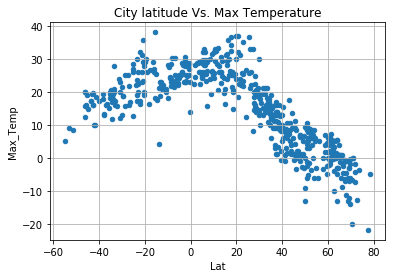

In [65]:
#plt.scatter(Lat, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",linewidths=1)

df.plot(kind="scatter", x="Lat", y="Max_Temp", 
              grid=True,
              title="City latitude Vs. Max Temperature")

#### Latitude vs. Humidity Plot

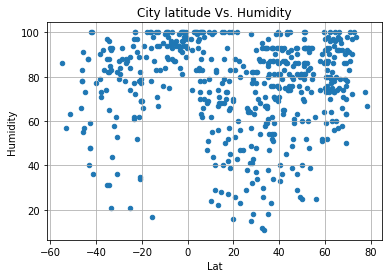

In [66]:
df.plot(kind="scatter", x="Lat", y="Humidity", 
              grid=True,
              title="City latitude Vs. Humidity")

#### Latitude vs. Cloudiness Plot

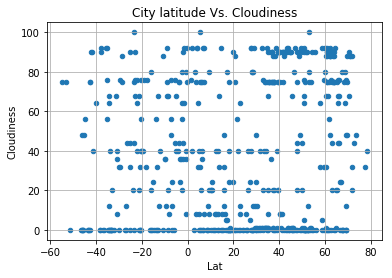

In [67]:
df.plot(kind="scatter", x="Lat", y="Cloudiness", 
              grid=True,
              title="City latitude Vs. Cloudiness")

#### Latitude vs. Wind Speed Plot

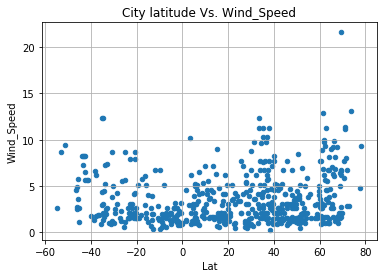

In [68]:
df.plot(kind="scatter", x="Lat", y="Wind_Speed", 
              grid=True,
              title="City latitude Vs. Wind_Speed")